# Data Science Challenge

### 0) Imports for Solution

In [2]:
import pandas as pd
import urllib
import seaborn as sns
import matplotlib.pyplot as plt

### 1) Downloading Data and Storing Locally

In [4]:
# load into pandas dataframe for use in questions below
url = 'https://data.gov.au/data/dataset/ad89b4ff-541a-4729-b93c-4d2f5682e4c8/resource/809c77d8-fd68-4a2c-806f-c63d64e69842/download/airline_portcountry.csv'
urllib.request.urlretrieve(url, 'airline_portcountry.csv')
df = pd.read_csv('airline_portcountry.csv')

# Alternate interaction with API
"""
limit = 50000
url = 'https://data.gov.au/data/api/3/action/datastore_search?resource_id=809c77d8-fd68-4a2c-806f-c63d64e69842&limit='+ str(limit) 
fileobj = urllib.request.urlopen(url)
data = fileobj.read()
encoding = fileobj.info().get_content_charset('utf-8')
results = json.loads(data.decode(encoding))['result']['records']
df = pd.DataFrame(results)
"""

df.head(10)

,Month,Airline,Port_Country,Passengers_In,Freight_In_(tonnes),Mail_In_(tonnes),Passengers_Out,Freight_Out_(tonnes),Mail_Out_(tonnes),Year,Month_num
0,31048,Air Caledonie,New Caledonia,725,0.368,0.000,474,0.167,0.000,1985,1
1,31048,Air China,China,1311,9.158,0.000,1232,2.587,0.000,1985,1
2,31048,Air India,India,1423,44.823,0.000,970,6.708,0.000,1985,1
3,31048,Air India,Singapore,501,10.583,0.000,306,124.966,0.000,1985,1
4,31048,Air Nauru,Nauru,161,0.212,0.000,96,23.996,0.000,1985,1
5,31048,Air New Zealand,New Zealand,24588,873.066,0.374,20692,348.740,0.122,1985,1
6,31048,Air Niugini,Papua New Guinea,2954,20.035,0.000,2906,69.047,0.000,1985,1
7,31048,Air Pacific,Fiji,3350,26.257,0.000,2470,100.639,0.000,1985,1
8,31048,Air Pacific,Solomon Islands,574,3.227,0.000,578,12.322,0.000,1985,1
9,31048,Air Pacific,Vanuatu,280,0.356,0.000,205,2.735,0.000,1985,1


### 1. How many passengers came in and out of Australia for each Airline in each month of 2019?

In [5]:
# limit frame to 2019 and groupby airline and month
df_inout = df.loc[(df["Year"] == 2019)].groupby(["Airline","Month_num"])[["Passengers_In", "Passengers_Out"]]
print("A dataframe summarising passengers in and out by airline and month for 2019\n")
print(df_inout.sum())

A dataframe summarising passengers in and out by airline and month for 2019

                                       Passengers_In  Passengers_Out
Airline                     Month_num                               
Air Caledonie International 1                   8291            7336
                            2                   3889            6148
                            3                   3957            4409
                            4                   4965            4911
                            5                   3996            3786
                            6                   4001            5143
                            7                   3969            4200
                            8                   5575            5017
                            9                   4377            4832
                            10                  5962            5901
                            11                  5233            5542
                          

### 2. In the last 6 months which port country was responsible for the most passengers coming into the country?

In [6]:
# Keeping it general for the last 6 months - assuming dataframe already date sorted
# There are probably more elegant ways of doing this - e.g. a rolling window used in Q3

df_6_mo = df #set new df for question
df_6_mo["Year_Month_num"] = df_6_mo["Year"].apply(str) + " - " + df_6_mo["Month_num"].apply(str) # create new column to filter
last_months = df.groupby(["Year","Month_num"]).count()[-6:].index.values # get last 6 months
time_filter = [str(y) + " - " + str(m) for (y,m) in last_months]
print("The last 6 months we are investigating (Year - Month)\n")
print(time_filter)
df_6_mo = df_6_mo[df_6_mo["Year_Month_num"].isin(time_filter)]
df_6_mo = df_6_mo.groupby("Port_Country").sum()["Passengers_In"].sort_values(ascending = False)
print("\nIn the last 6 months, the most passengers have come from", df_6_mo.index[0], "with", df_6_mo.values[0], "passengers")
print('\nThe top 5 countries are\n')
print(df_6_mo.head(5))

The last 6 months we are investigating (Year - Month)

['2020 - 7', '2020 - 8', '2020 - 9', '2020 - 10', '2020 - 11', '2020 - 12']

In the last 6 months, the most passengers have come from New Zealand with 26803 passengers

The top 5 countries are

Port_Country
New Zealand             26803
Qatar                   23257
Singapore               20189
United Arab Emirates    15575
USA                     13381
Name: Passengers_In, dtype: int64


### 3. What is the 3 month rolling average of freight coming into Australia for each airline in 2018?

In [7]:
# solve this using a rolling window average
df_freight = df
df_freight = df_freight.groupby(["Airline","Year", "Month_num"]).sum()
df_freight['3_mon_freight_avg'] = df_freight["Freight_In_(tonnes)"].rolling(window=3).mean()
df_freight = df_freight[df_freight.index.get_level_values(1) == 2018]
df_freight[["Freight_In_(tonnes)", '3_mon_freight_avg']]

Freight_In_(tonnes)  \
Airline                     Year Month_num                        
Air Caledonie International 2018 1                        2.942   
                                 2                        4.546   
                                 3                        4.184   
                                 4                        8.042   
                                 5                        2.332   
                                 6                        4.765   
                                 7                        2.681   
                                 8                        7.005   
                                 9                        4.509   
                                 10                       4.714   
                                 11                       3.119   
                                 12                       1.920   
Air Canada                  2018 1                      268.328   
                                 2                      242.434   
                                 3                      336.101   
                                 4                      389.111   
                                 5                      433.189   
                                 6                      522.835   
                                 7                      370.029   
                                 8                      438.725   
                                 9                      338.763   
                                 10                     339.253   
                                 11                     340.477   
                                 12                     375.061   
Air China                   2018 1                      915.455   
                                 2                      645.869   
                                 3                      594.755   
                                 4                      580.109   
                                 5                      546.435   
                                 6                      483.888   
...                                                         ...   
Vietnam Airlines            2018 7                      880.212   
                                 8                      934.759   
                                 9                      995.323   
                                 10                     897.861   
                                 11                     898.625   
                                 12                     782.378   
Virgin Australia            2018 1                      793.176   
                                 2                      705.016   
                                 3                      923.536   
                                 4                      966.311   
                                 5                      995.750   
                                 6                     1186.326   
                                 7                     1516.545   
                                 8                     1793.727   
                                 9                     1370.282   
                                 10                    1440.847   
                                 11                    1470.953   
                                 12                    1296.616   
Xiamen Airlines             2018 1                      405.411   
                                 2                      230.289   
                                 3                      421.725   
                                 4                      493.076   
                                 5                      462.141   
                                 6                      429.244   
                                 7                      565.850   
                                 8                      462.732   
                                 9                      452.296   
                        

### 4. Which 3 airlines have the highest mail inbound/outbound ratio across the whole dataset?


In the case where airlines that do not ship outbound mail are included, we have division by zero
i.e. inbound/outbound causes division by zero

There are 57 airlines with no reported outbound mail.
If we exclude these airlines, the three airlines with the highest inbound/outbound ratio are the following


                             Mail_ratio  Mail_In_(tonnes)  Mail_Out_(tonnes)
Airline                                                                     
Asiana Airlines            53639.381443          5203.020              0.097
Middle East Airlines        1455.000000            17.460              0.012
Aeroflot Russian Intl A/l    576.833333             6.922              0.012


If we only consider airlines that have shipped at least 1000 tonnes of out mail, the following are the highest:


                            Mail_ratio  Mail_In_(tonnes)  Mail_Out_(tonnes)
Airline                                                                    
Japan Airlines               28.076071 

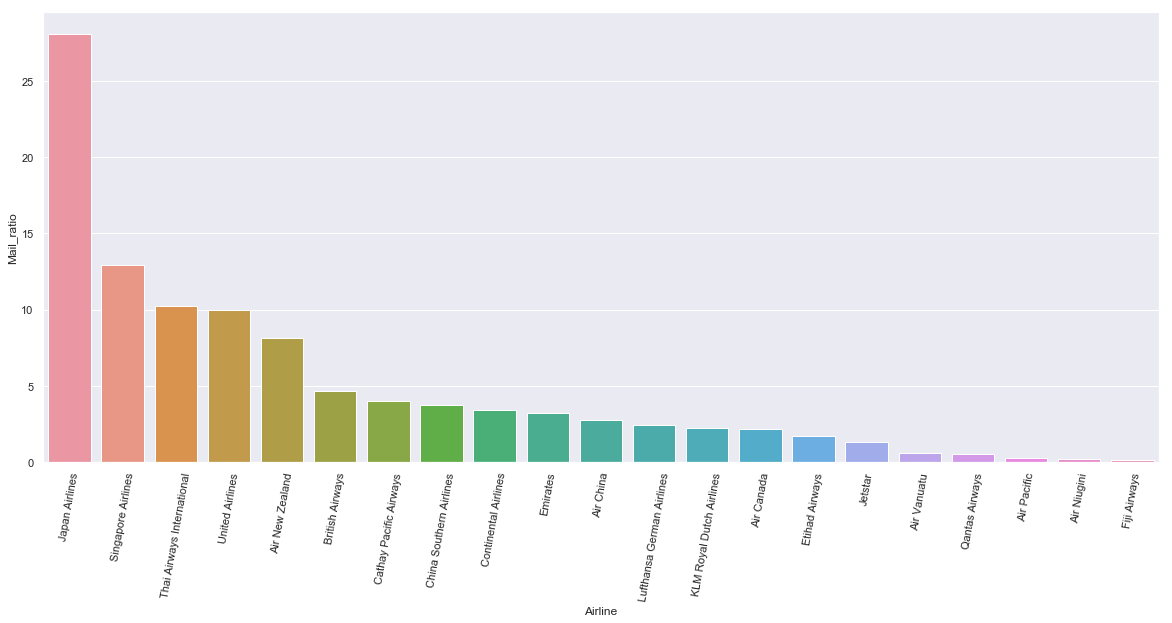

In [8]:
# assuming we are looking at the highest ratio calculated over the full period !!

df_ratio = df.groupby("Airline").sum()
df_ratio["Mail_ratio"] = df_ratio["Mail_In_(tonnes)"] / df_ratio["Mail_Out_(tonnes)"] #calculate ratio
df_ratio = df_ratio.sort_values("Mail_ratio", ascending = False)

print("\nIn the case where airlines that do not ship outbound mail are included, we have division by zero")
print("i.e. inbound/outbound causes division by zero")
excl_airlines = df_ratio[df_ratio["Mail_Out_(tonnes)"] == 0].index.values
print(f"\nThere are {len(excl_airlines)} airlines with no reported outbound mail.")

print("If we exclude these airlines, the three airlines with the highest inbound/outbound ratio are the following\n\n")
print(df_ratio[df_ratio["Mail_Out_(tonnes)"] != 0][["Mail_ratio","Mail_In_(tonnes)","Mail_Out_(tonnes)"]][0:3])

print("\n\nIf we only consider airlines that have shipped at least 1000 tonnes of out mail, the following are the highest:\n\n")
print(df_ratio[df_ratio["Mail_Out_(tonnes)"] > 1000][["Mail_ratio","Mail_In_(tonnes)","Mail_Out_(tonnes)"]][0:3])

print('\n\nA nice graph of mail shipping ratios by significant outbound shippers for fun')
df_plot = df_ratio[df_ratio["Mail_Out_(tonnes)"] > 1000]

sns.set(rc={'figure.figsize':(20,8.27)})
p = sns.barplot(x=df_plot.index, y = "Mail_ratio", data = df_plot)
plt.xticks(rotation=80)
plt.show()

### 5. BONUS: Using the dataset, identify an airline that may have changed name and explain your approach?

In [57]:
# There are lots of cool ways we can do this, I will attempt to do this by analysing the textual similarity
# of the different airlines. The underlaying assumption is that airlines will be renamed to something similar!

#import sys
#!{sys.executable} -m pip install fuzzywuzzy

from fuzzywuzzy import fuzz, process

#get a list of the unique airlines
airline_names = df["Airline"].unique()

#remove Air and Airline as these are generic terms
airline_processed = df["Airline"].apply(lambda x : x.replace("Airlines", ""))
airline_processed = airline_processed.apply(lambda x : x.replace("Airways", ""))
airline_processed = airline_processed.apply(lambda x : x.replace("Air", "")).unique()

#create a map from the processed airline to the original airline
match_map = dict(zip(airline_processed, airline_names))

#set a limit for what we would consider a potential match
threshold = 85

#match dictionary for final output
potential_matches = {}

for i, airline in enumerate(airline_processed):
    # compare the string of a given airline to all other airlines
    # find the best 2 matches for each airline
    matches = process.extract(airline, airline_processed, limit=3)[-2:]
    for (match, score) in matches:
        # iterate through our matches and see if they meet the thresholds
        if score >= threshold:
            potential_matches.setdefault(airline_names[i], []).append(match_map[match])

print("Some potential airline name changes! - Note this is far from perfect \n")
for airline in potential_matches:
    print(f"Airline Name: {airline}")
    print(f"Potential Renames {potential_matches[airline]}\n")
    
    
# Alternatively, we could conduct analysis to see the start and ending years of airlines, and there similarities
# For example, if an airline named "Air Inc" carries 1000 passengers a day and is last reported Oct-2001 and another
# airline "Air Inc 2.0" begins Sep-2001 and carries 1050 passengers a day...
# Unfortunatelt I don't have time to test this!

Some potential airline name changes! - Note this is far from perfect 

Airline Name: Air Caledonie
Potential Renames ['Air Caledonie International']

Airline Name: Air China
Potential Renames ['China Airlines', 'China Eastern Airlines']

Airline Name: Air Nauru
Potential Renames ['Nauru Airlines']

Airline Name: Air New Zealand
Potential Renames ['LAN Airlines']

Airline Name: Air Pacific
Potential Renames ['Cathay Pacific Airways', 'Pacific Air Express']

Airline Name: Canadian Airlines Intl
Potential Renames ['Aeroflot Russian Intl A/l']

Airline Name: Cathay Pacific Airways
Potential Renames ['Air Pacific']

Airline Name: Continental Airlines
Potential Renames ['Continental Micronesia']

Airline Name: Flying Tiger Line
Potential Renames ['Tiger Airways', 'Our Airline']

Airline Name: Pan American
Potential Renames ['American Airlines']

Airline Name: Thai Airways International
Potential Renames ['National Airlines', 'Thai AirAsia X']

Airline Name: United Airlines
Potential Renames 